In [ ]:
!pip install xlrd

# Risk Factors :

Sob a perspectiva de evitar fazer cálculos desnecessários, aumentando o risco de erros de validação, e tratamento dos dados de mercado, foram utilizados o conjunto de dados a respeito dos Fatores fornecidos pelo *NEFIN* : https://nefin.com.br/data/risk_factors.html . O conjunto de dados é dividido em 6 arquivos separados, desde $02$ de Janeiro de 2001

### Library

In [1]:
# Initial Imports:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



# To run models:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from joblib import dump, load
# Import Linear Regression Model from SKLearn:
from sklearn.linear_model import LinearRegression

# For visualizations:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Project files
from evaluation import *
from portfolio import *

### Data 

In [2]:
# Rm - Market Factor
MKT = pd.read_excel("./data/risk_factors/Market_Factor.xls",index_col=None)

# High minus low - Value Factor
HML = pd.read_excel("./data/risk_factors/HML_Factor.xls",index_col=None)

# Illiquid Minus Liquid - Liquidity Factor
IML = pd.read_excel("./data/risk_factors/IML_Factor.xls",index_col=None)

#Small minus big - Size Factor
SMB = pd.read_excel("./data/risk_factors/SMB_Factor.xls",index_col=None)

#Winners Minus Loser - Momentum Factor
WML = pd.read_excel("./data/risk_factors/WML_Factor.xls",index_col=None)

# Daily Risk Free - Rf
RF = pd.read_excel("./data/risk_factors/Risk_Free.xls", index_col = None)

# TEST stock:
stocks_folder = "./data/stocks"

In [3]:
HML.columns

Index(['year', 'month', 'day', 'HML'], dtype='object')

### Functions:

In [4]:
stock = choose_stock("ITUB3",stocks_folder)

Index(['Data', 'Fech Ajustado', 'Variação(%)', 'Fech Histórico',
       'Abertura Ajustado', 'Mín Ajustado', 'Médio Ajustado', 'Máx Ajustado',
       'Vol (MM R$)', 'Negócios', 'Fator', 'Tipo'],
      dtype='object')


In [5]:
stock.columns

Index(['Fech Ajustado', 'Variação(%)', 'Fech Histórico', 'Abertura Ajustado',
       'Mín Ajustado', 'Médio Ajustado', 'Máx Ajustado', 'Vol (MM R$)',
       'Negócios', 'Fator', 'Tipo'],
      dtype='object')

In [6]:
stock_prepared = prepare_portfolio(stock,1)

In [7]:
# analyse_stock(stock)

In [8]:
stock_prepared.head()

,Close,Returns
date,,
2023/04/28,22.072350,1.191022
2023/04/27,21.812558,1.771562
2023/04/26,21.432861,-0.786309
2023/04/25,21.602726,0.886608
2023/04/24,21.412877,-0.832948


In [9]:
stock.columns

Index(['Fech Ajustado', 'Variação(%)', 'Fech Histórico', 'Abertura Ajustado',
       'Mín Ajustado', 'Médio Ajustado', 'Máx Ajustado', 'Vol (MM R$)',
       'Negócios', 'Fator', 'Tipo'],
      dtype='object')

In [10]:
HML.columns

Index(['year', 'month', 'day', 'HML'], dtype='object')

In [11]:
HML = pre_processing(HML)
MKT = pre_processing(MKT)
IML = pre_processing(IML)
SMB = pre_processing(SMB)
WML = pre_processing(WML)
RF = pre_processing(RF)

In [12]:
factors = pd.concat([MKT,HML,IML,SMB,WML,RF],axis=1)
factors.head()

,Rm_minus_Rf,HML,IML,SMB,WML,Risk_free
date,,,,,,
2001/01/02,0.006601,0.065490,0.014109,0.000524,-0.006308,0.000579
2001/01/03,0.062427,0.009390,0.004510,0.005390,-0.028644,0.000577
2001/01/04,-0.000310,-0.002327,-0.009227,0.006690,-0.000946,0.000574
2001/01/05,-0.012839,-0.002397,0.025124,0.003523,0.005985,0.000573
2001/01/08,0.003982,0.001948,-0.001175,0.007883,-0.004099,0.000573


In [13]:
MKT.head(10)

,Rm_minus_Rf
date,
2001/01/02,0.006601
2001/01/03,0.062427
2001/01/04,-0.000310
2001/01/05,-0.012839
2001/01/08,0.003982
2001/01/09,0.019986
2001/01/10,-0.004368
2001/01/11,0.004694
2001/01/12,-0.006783


In [14]:
factors.tail()

,Rm_minus_Rf,HML,IML,SMB,WML,Risk_free
date,,,,,,
2023/04/24,-0.003781,0.003445,0.002344,0.002098,-0.008456,0.000508
2023/04/25,-0.006295,-0.004699,-0.001941,-0.008449,0.008281,0.000508
2023/04/26,-0.007424,0.007253,0.012345,0.010940,0.005710,0.000508
2023/04/27,0.005182,0.010677,0.003433,0.007564,-0.010000,0.000508
2023/04/28,0.014016,0.010166,0.004222,0.008966,-0.022140,0.000508


In [15]:
stock.tail()

,Fech Ajustado,Variação(%),Fech Histórico,Abertura Ajustado,Mín Ajustado,Médio Ajustado,Máx Ajustado,Vol (MM R$),Negócios,Fator,Tipo
date,,,,,,,,,,,
2001/01/08,0.949153,0,189,0.949153,0.949153,0.949153,0.949153,0.12474,2,1000,ON *EJ
2001/01/05,0.949153,0,189,0.949153,0.949153,0.949153,0.949153,0.01701,3,1000,ON *EJ
2001/01/04,0.949153,2.162162,189,0.949153,0.949153,0.949153,0.949153,0.02268,1,1000,ON *EJ
2001/01/03,0.929065,nd,185,0.929065,0.929065,0.929065,0.929065,0.00555,1,1000,ON *EJ
2001/01/02,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd


In [16]:
# concatenating two Dataframes:
combined_df = merge_portifolio(stock_prepared, factors)

In [17]:
combined_df

,Mkt-RF,HML,IML,SMB,WML,Close,Returns
date,,,,,,,
2001/01/04,-0.000310,-0.002327,-0.009227,0.006690,-0.000946,0.949153,2.162162
2001/01/05,-0.012839,-0.002397,0.025124,0.003523,0.005985,0.949153,0.000000
2001/01/08,0.003982,0.001948,-0.001175,0.007883,-0.004099,0.949153,0.000000
2001/01/09,0.019986,-0.000916,-0.003978,0.005928,0.009564,0.949153,0.000000
2001/01/10,-0.004368,0.012468,0.022134,0.013150,-0.000691,0.949153,0.000000
...,...,...,...,...,...,...,...
2023/04/24,-0.003781,0.003445,0.002344,0.002098,-0.008456,21.412877,-0.832948
2023/04/25,-0.006295,-0.004699,-0.001941,-0.008449,0.008281,21.602726,0.886608
2023/04/26,-0.007424,0.007253,0.012345,0.010940,0.005710,21.432861,-0.786309


## Split Train / Test Method:


In [33]:
# Define X and y variables:
X = combined_df.drop('Returns', axis=1)
X = X.drop('Close',axis=1)
y = combined_df.loc[:, 'Returns']

In order to preserve the temporal order of the data:

In [63]:
# Split into Training/Testing Data:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]
close_test=combined_df["Close"][split:]
close_test

date
2019/02/08    20.834628
2019/02/11    20.539193
2019/02/12    20.873163
2019/02/13    20.423587
2019/02/14    20.995191
                ...    
2023/04/24    21.412877
2023/04/25    21.602726
2023/04/26    21.432861
2023/04/27    21.812558
2023/04/28    22.072350
Name: Close, Length: 1049, dtype: float64

## Make predictions:

In [64]:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model = lin_reg_model.fit(X_train, y_train)
predictions = lin_reg_model.predict(X_test)

In [65]:
# Convert y_test to a dataframe:
y_test = y_test.to_frame()

In [66]:
signals_df = y_test.copy()

# Add "predictions" to dataframe:
y_test['Predictions'] = predictions
y_test["Close"]=close_test

# Add "Buy Signal" column based on whether day's predictions were greater than the day's actual returns:
y_test['Buy Signal'] = np.where(y_test['Predictions'] > y_test['Returns'], 1.0,0.0)

# Drop nulls:
y_test=y_test.dropna()

y_test.head()


,Returns,Predictions,Close,Buy Signal
date,,,,
2019/02/08,2.951444,0.696286,20.834628,0.0
2019/02/11,-1.418002,-0.547074,20.539193,1.0
2019/02/12,1.626016,1.432179,20.873163,0.0
2019/02/13,-2.153846,-0.291501,20.423587,1.0
2019/02/14,2.798742,1.789381,20.995191,0.0


In [67]:
# Generate and view signals dataframe using generate signals function
signals_df=generate_signals(y_test)
signals_df.head(10)

,Returns,Predictions,Close,Buy Signal,Position,Entry/Exit,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
date,,,,,,,,,,,,
2019/02/12,1.626016,1.432179,20.873163,0.0,0.0,-1.0,-2000.0,0.000000,100667.941225,100667.941225,0.006679,0.006679
2019/02/13,-2.153846,-0.291501,20.423587,1.0,2000.0,1.0,2000.0,40847.174946,59820.766280,100667.941225,0.000000,0.006679
2019/02/14,2.798742,1.789381,20.995191,0.0,0.0,-1.0,-2000.0,0.000000,101811.148323,101811.148323,0.011356,0.018111
2019/02/15,-0.244723,-0.328707,20.943811,0.0,0.0,0.0,0.0,0.000000,101811.148323,101811.148323,0.000000,0.018111
2019/02/18,-1.441276,-0.653413,20.641953,1.0,2000.0,1.0,2000.0,41283.905747,60527.242576,101811.148323,0.000000,0.018111
2019/02/19,2.053516,0.966254,21.065839,0.0,0.0,-1.0,-2000.0,0.000000,102658.919878,102658.919878,0.008327,0.026589
2019/02/20,-0.884146,-0.950801,20.879586,0.0,0.0,0.0,0.0,0.000000,102658.919878,102658.919878,0.000000,0.026589
2019/02/21,2.645340,0.471037,21.431922,0.0,0.0,0.0,0.0,0.000000,102658.919878,102658.919878,0.000000,0.026589
2019/02/22,1.203995,0.828764,21.689961,0.0,0.0,0.0,0.0,0.000000,102658.919878,102658.919878,0.000000,0.026589


In [68]:
algo_evaluation(signals_df)

,Backtest
Annual Return,-0.034562
Cumulative Returns,-0.150206
Annual Volatility,0.096056
Sharpe Ratio,-0.359807
Sortino Ratio,-0.504549


In [69]:
# Generate Metrics for Function vs. Buy-and-Hold Strategy:
algo_vs_underlying(signals_df)

,Algo,Underlying
Annual Return,-0.034562,0.057574
Cumulative Returns,-0.150206,0.057451
Annual Volatility,0.096056,0.297165
Sharpe Ratio,-0.359807,0.193746
Sortino Ratio,-0.504549,0.279269


In [70]:
# Generate Evaluation table:
trade_evaluation_df=trade_evaluation(signals_df)
trade_evaluation_df

,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,,2019/02/12,0,0,20.873163,0,100667.941225,100667.941225
1,2019/02/13,2019/02/14,2000.0,20.423587,20.995191,100667.941225,101811.148323,1143.207097
2,2019/02/18,2019/02/19,2000.0,20.641953,21.065839,101811.148323,102658.919878,847.771556
3,2019/02/25,2019/02/28,2000.0,21.452356,21.119709,102658.919878,101993.625298,-665.294581
4,2019/03/01,2019/03/07,2000.0,20.885385,21.170649,101993.625298,102564.152881,570.527583
...,...,...,...,...,...,...,...,...
252,2023/04/06,2023/04/10,2000.0,20.733421,20.903285,83160.811576,83500.539915,339.728339
253,2023/04/13,2023/04/14,2000.0,21.67267,21.982422,83500.539915,84120.044533,619.504618
254,2023/04/17,2023/04/18,2000.0,21.92247,21.922470,84120.044533,84120.044533,0.000000
255,2023/04/19,2023/04/25,2000.0,21.552765,21.602726,84120.044533,84219.964632,99.920100


## ANOVA Table / Other Visualizations for 3-Factor Models:

### ATT

In [71]:
# To run models:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from joblib import dump, load

In [72]:
# Set X and y variables:
y = combined_df.loc[:, 'Returns']
X = combined_df.drop('Returns', axis=1)
X = X.drop('Close',axis=1)

# Add "Constant" column of "1s" to DataFrame to act as an intercept, using StatsModels:
X = sm.add_constant(X)

# Split into Training/Testing data:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Run Ordinary Least Squares (OLS )Model:
model = sm.OLS(y_test, X_test)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 28 May 2023   Prob (F-statistic):          5.73e-225
Time:                        16:58:42   Log-Likelihood:                -1618.8
No. Observations:                1049   AIC:                             3250.
Df Residuals:                    1043   BIC:                             3279.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.035      0.671      0.5

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


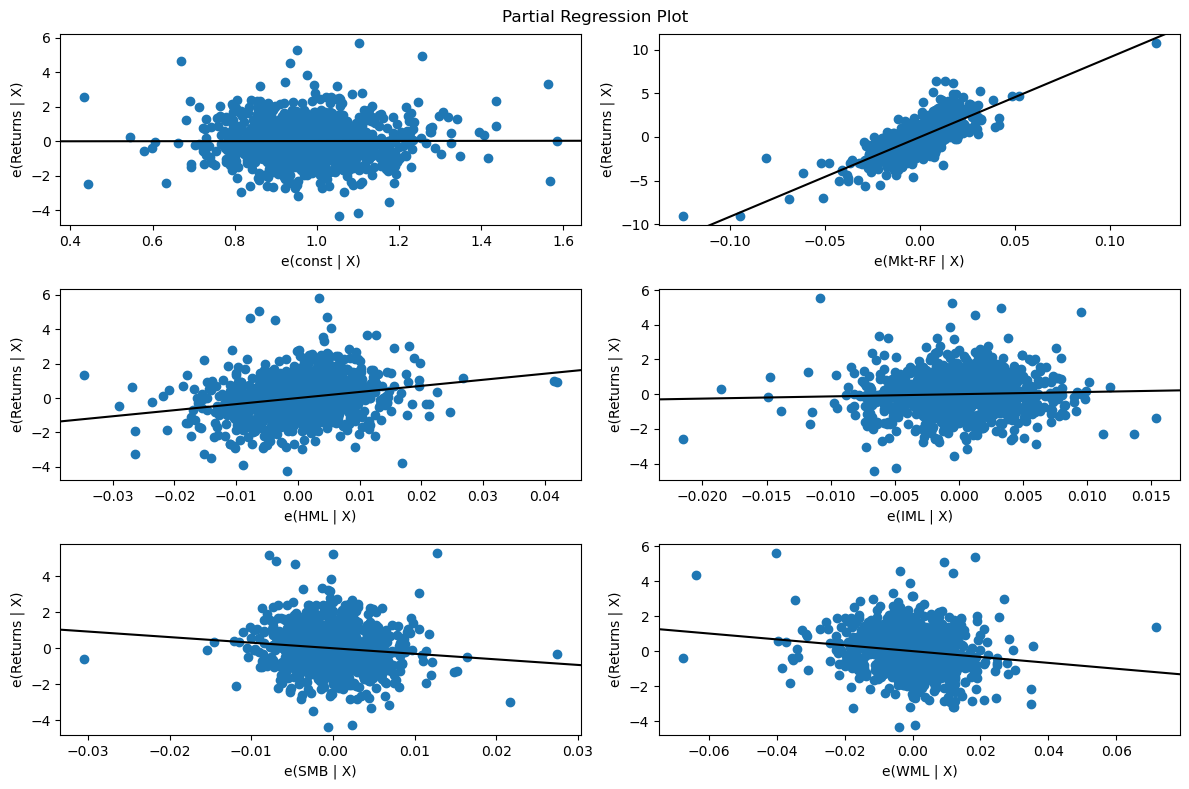

In [73]:

# Plot Partial Regression Plot:
fig = sm.graphics.plot_partregress_grid(model_results, fig = plt.figure(figsize=(12,8)))
plt.show()

<Axes: >

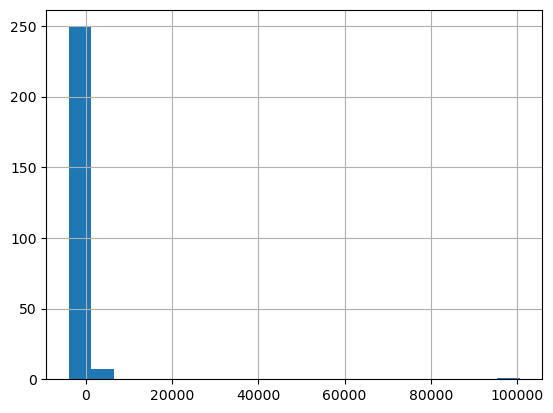

In [74]:
# Plot P&L Histrogram:
trade_evaluation_df["Profit/Loss"].hist(bins=20)

In [75]:
# Define function that plots Algo Cumulative Returns vs. Underlying Cumulative Returns:
def underlying_returns(signals_df):
    underlying=pd.DataFrame()
    underlying["Close"]=signals_df["Close"]
    underlying["Underlying Daily Returns"]=underlying["Close"].pct_change()
    underlying["Underlying Daily Returns"].fillna(0,inplace=True)
    underlying['Underlying Cumulative Returns']=(1 + underlying['Underlying Daily Returns']).cumprod() - 1
    underlying['Algo Cumulative Returns']=signals_df["Portfolio Cumulative Returns"]

    graph_df=underlying[["Underlying Cumulative Returns", "Algo Cumulative Returns"]]

    return graph_df

<Axes: xlabel='date'>

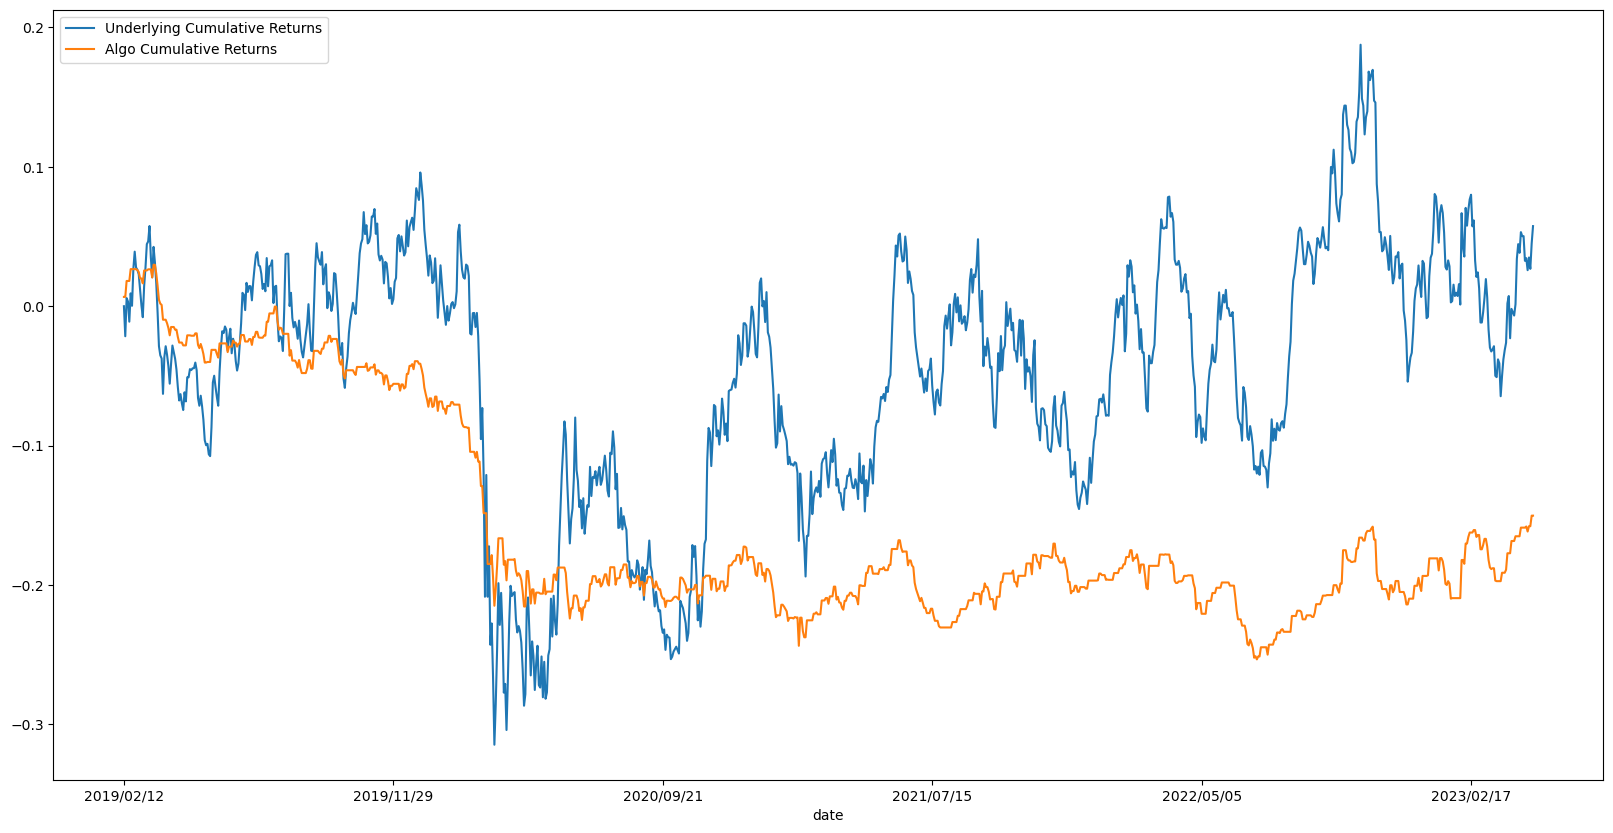

In [76]:

# Generate Cumulative Return plot using above defined function:
underlying_returns(signals_df).plot(figsize=(20,10))